<h1>Import all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
warnings.filterwarnings("ignore")

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected

<h1>Load all the data

In [2]:
data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

<h1>Get info of all columns</h1>

As we see some data out of these namely <i>Cabin</i> is missing

In [3]:
data.info()                 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


<h3>Lets check the mean , min value and max value for differen attributes</h3>

In [4]:
data.describe()             

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<h1>Data Preprocessing</h1>

Since the cabin data is missing by larger than 25% we can drop the column, also the ticket column dont seem to be of 
much help,we can drop that too.

In [5]:
 data = data.drop(['Ticket','Cabin'],axis=1)

Also dropping the rows which contains atleast one value as NaN

In [6]:
#data = data.dropna()       

<h1>Data Visualization</h1>

Let's visualize survival data.

In [7]:
data['Died'] = 1 - data['Survived']    # creating a new column for the died

Text(0.5,1,'Survival Data')

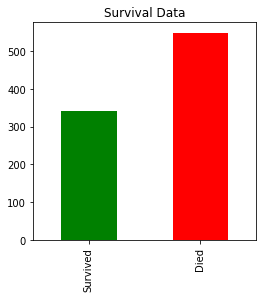

In [8]:
data.agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(4,4), colors=['g', 'r']);
plt.title("Survival Data")

Survival data based on gender

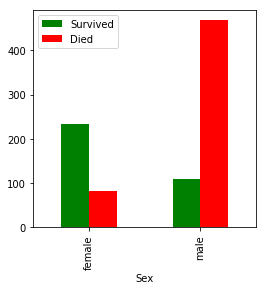

In [9]:
data.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(4,4),  colors=['g', 'r']);

It seems the male passengers are more likely to die

Lets Check for the ratio for male to female for the same graph

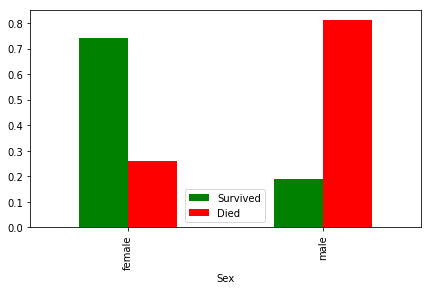

In [10]:
data.groupby('Sex').agg('mean')[['Survived', 'Died']].plot(kind='bar', figsize=(7,4),  colors=['g', 'r']);

Lets now relate the Survival data with the Age

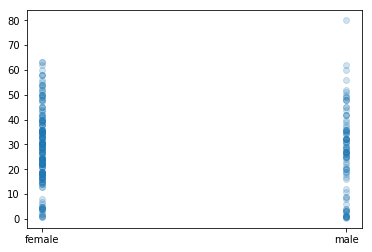

In [11]:
#data.groupby('Age').agg('sum')[['Survived', 'Died']].plot(kind='scatter', figsize=(4,4),  colors=['g', 'r']);
plt.scatter(data[data.Survived==1].Sex,data[data.Survived==1].Age,alpha=0.2)
print(data.groupby('Age').Survived)

Lets now relate the Survival data with the Ticket Fare

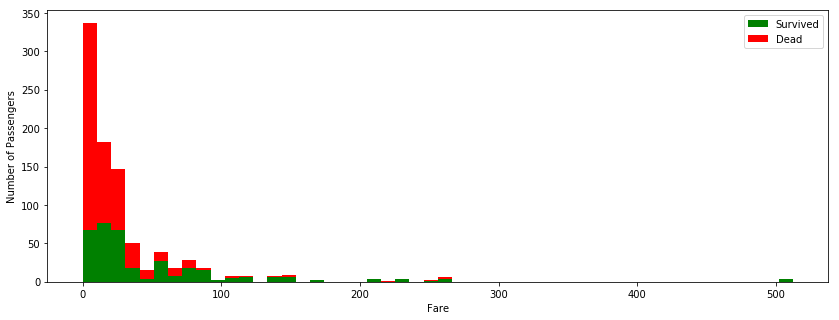

In [12]:
fig = plt.figure(figsize=(14,5))
plt.hist([data[data.Survived==1].Fare,data[data.Survived==0].Fare],stacked=True, color = ['g','r'],bins = 50, 
         label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.legend()

As we see the passengers with cheap tickets are more likely to die

Let's now combine the age, the fare and the survival on a single chart.

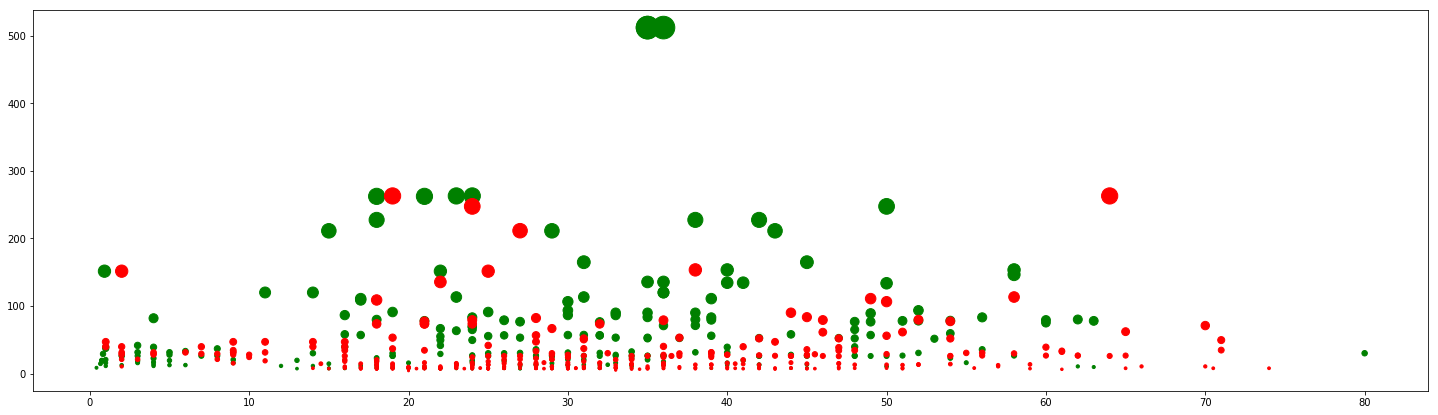

In [13]:
plt.figure(figsize=(25, 7))
ax = plt.subplot()

ax.scatter(data[data['Survived'] == 1]['Age'], data[data['Survived'] == 1]['Fare'], 
           c='green', s=data[data['Survived'] == 1]['Fare'])
ax.scatter(data[data['Survived'] == 0]['Age'], data[data['Survived'] == 0]['Fare'], 
           c='red', s=data[data['Survived'] == 0]['Fare']);

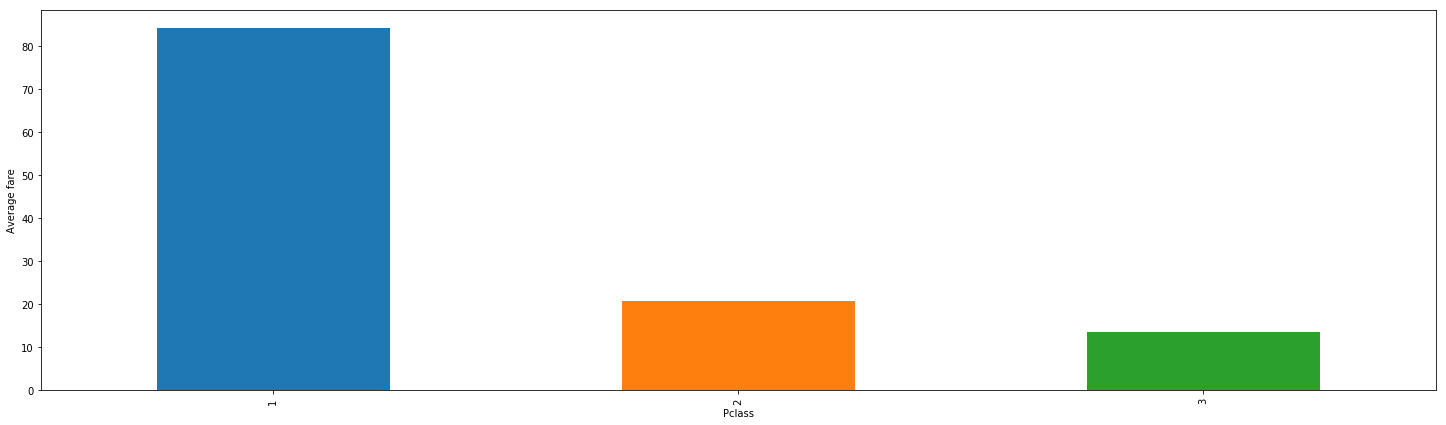

In [14]:
ax = plt.subplot()
ax.set_ylabel('Average fare')
data.groupby('Pclass').mean()['Fare'].plot(kind='bar', figsize=(25, 7), ax = ax);

Lets vizualise the data for Pclass with Fare and Survival rate

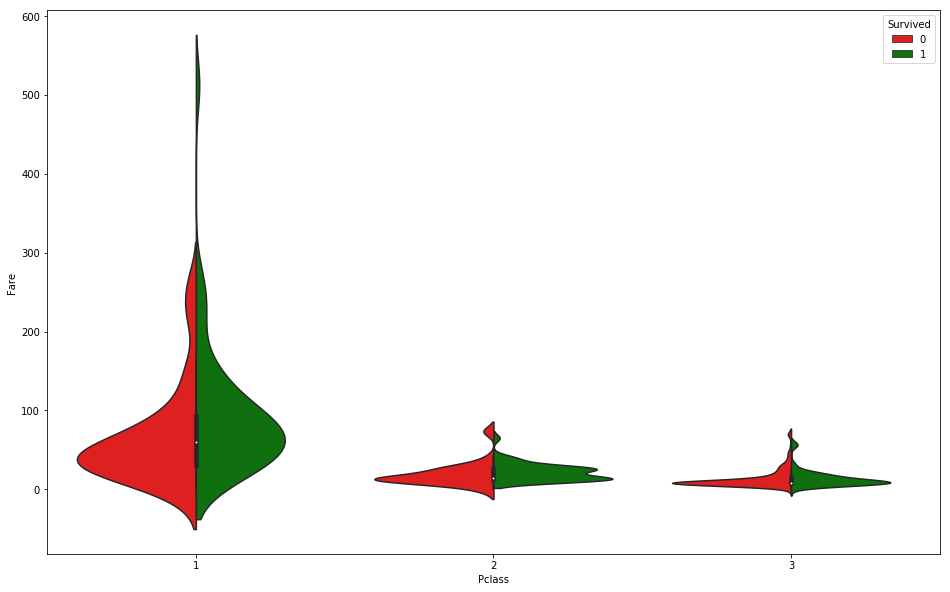

In [15]:
fig = plt.figure(figsize=(16, 10))
sns.violinplot(x='Pclass', y='Fare', 
               hue='Survived', data=data, 
               split=True,
               palette={0: "r", 1: "g"}
              );

As we see the passengers in the class 1 who had costly ticket value all have survived. And also in all classes passenger with cheap ticket fare had less chances to survive.



Let's now see how the embarkation site affects the survival.


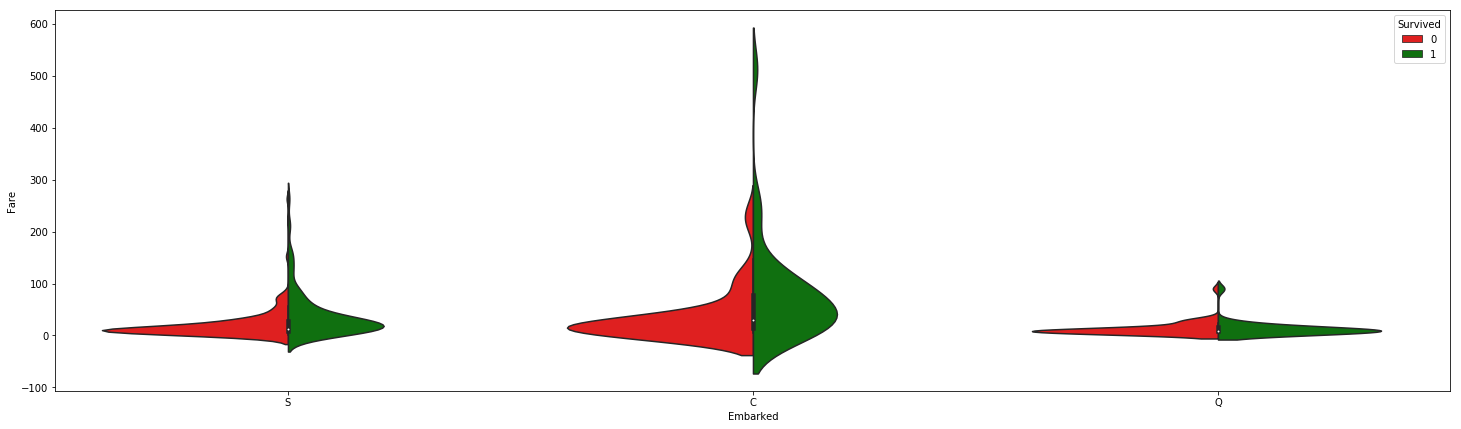

In [16]:
fig = plt.figure(figsize=(25,7))
sns.violinplot(x='Embarked', y='Fare', hue='Survived', data=data, split=True, palette={0: "r", 1: "g"});

<h1>Feature engineering</h1>

In this part, lets how to process and transform the variables in such a way the data becomes manageable by a 
machine learning algorithm. Like to process text variables like the passenger names and integrate this information in our model.

Get Combined data of train and test (Since we need to pre process the test data too)

In [17]:
target = []
def get_combined_data():
    global target
    train = pd.read_csv('train.csv')
    test = pd.read_csv('test.csv')
    target = train.Survived;
    train.drop(['Survived'],axis=1,inplace=True)
    
    data1 = train.append(test)
    data1.reset_index(inplace=True)
    return data1

data = get_combined_data()

In [18]:
data.head()

,index,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
data.drop(['Ticket','Cabin','index'],axis=1,inplace=True)

<b>Extracting the passenger titles

In [20]:
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

def get_titles():
    data['Title'] = data.Name.map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    data.Title = data.Title.map(Title_Dictionary)
    
    return data

data = get_titles()

In [21]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


<b>Preprocessing the ages

In [22]:
data.Age.isnull().value_counts()

False    1046
True      263
Name: Age, dtype: int64

In [23]:
grouped_train = data.groupby(['Sex','Pclass','Title'])
grouped_median_train = grouped_train.median()
grouped_median_train = grouped_median_train.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]
grouped_median_train

,Sex,Pclass,Title,Age
0,female,1,Miss,30.0
1,female,1,Mrs,45.0
2,female,1,Officer,49.0
3,female,1,Royalty,40.5
4,female,2,Miss,20.0
5,female,2,Mrs,30.0
6,female,3,Miss,18.0
7,female,3,Mrs,31.0
8,male,1,Master,6.0
9,male,1,Mr,41.5


In [24]:
def fill_age(row):
    condition = (
        (grouped_median_train['Sex'] == row['Sex']) & 
        (grouped_median_train['Title'] == row['Title']) & 
        (grouped_median_train['Pclass'] == row['Pclass'])
    ) 
    return grouped_median_train[condition]['Age'].values[0]


def process_age():
    global data
    # a function that fills the missing values of the Age variable
    data['Age'] = data.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
    return data

data = process_age()

In [25]:
data.Age.isnull().value_counts()

False    1309
Name: Age, dtype: int64

<b>Preprocessing the names

In [26]:
def process_title():
    global data
    data.drop('Name',axis=1,inplace=True)
    # using label encoding of the titles
    data_dummies = pd.get_dummies(data.Title,prefix=['Title'])
    data = pd.concat([data,data_dummies],axis=1)
    data.drop('Title',axis=1,inplace=True)
    return data

data = process_title()

In [27]:
data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,['Title']_Master,['Title']_Miss,['Title']_Mr,['Title']_Mrs,['Title']_Officer,['Title']_Royalty
0,1,3,male,22.0,1,0,7.2500,S,0,0,1,0,0,0
1,2,1,female,38.0,1,0,71.2833,C,0,0,0,1,0,0
2,3,3,female,26.0,0,0,7.9250,S,0,1,0,0,0,0
3,4,1,female,35.0,1,0,53.1000,S,0,0,0,1,0,0
4,5,3,male,35.0,0,0,8.0500,S,0,0,1,0,0,0


<b>Processing Fare

In [28]:
def process_fares():
    global combined
    # there's one missing fare value - replacing it with the mean.
    data.Fare.fillna(data.Fare.mean(), inplace=True)
    return data

data = process_fares()

In [29]:
data.Fare.isnull().value_counts()

False    1309
Name: Fare, dtype: int64

<b>Processing Embarked

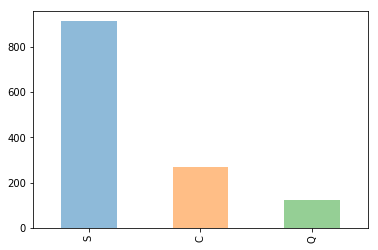

In [30]:
data[data.Embarked.isnull()]
data.Embarked.value_counts().plot(kind='bar',alpha = 0.5)

In [31]:
def process_embarked():
    global data
    # two missing embarked values - filling them with the most frequent one 
    data.Embarked.fillna('S', inplace=True)
    # dummy encoding 
    embarked_dummies = pd.get_dummies(data['Embarked'], prefix='Embarked')
    data = pd.concat([data, embarked_dummies], axis=1)
    data.drop('Embarked', axis=1, inplace=True)
    return data

data = process_embarked()

In [32]:
data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,['Title']_Master,['Title']_Miss,['Title']_Mr,['Title']_Mrs,['Title']_Officer,['Title']_Royalty,Embarked_C,Embarked_Q,Embarked_S
0,1,3,male,22.0,1,0,7.2500,0,0,1,0,0,0,0,0,1
1,2,1,female,38.0,1,0,71.2833,0,0,0,1,0,0,1,0,0
2,3,3,female,26.0,0,0,7.9250,0,1,0,0,0,0,0,0,1
3,4,1,female,35.0,1,0,53.1000,0,0,0,1,0,0,0,0,1
4,5,3,male,35.0,0,0,8.0500,0,0,1,0,0,0,0,0,1


<b>Processing Sex

In [33]:
def process_Sex():
    global data
    # mapping string values to numerical one 
    data['Sex'] = data['Sex'].map({'male':1, 'female':0})
    return  data
    
data = process_Sex()

In [34]:
data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,['Title']_Master,['Title']_Miss,['Title']_Mr,['Title']_Mrs,['Title']_Officer,['Title']_Royalty,Embarked_C,Embarked_Q,Embarked_S
0,1,3,1,22.0,1,0,7.2500,0,0,1,0,0,0,0,0,1
1,2,1,0,38.0,1,0,71.2833,0,0,0,1,0,0,1,0,0
2,3,3,0,26.0,0,0,7.9250,0,1,0,0,0,0,0,0,1
3,4,1,0,35.0,1,0,53.1000,0,0,0,1,0,0,0,0,1
4,5,3,1,35.0,0,0,8.0500,0,0,1,0,0,0,0,0,1


<b>Processing Pclass

In [35]:
def process_Pclass():
    global data
    
    pclass_dummies = pd.get_dummies(data.Pclass,prefix="Pclass")
    data = pd.concat([data,pclass_dummies],axis=1)
    data.drop('Pclass',inplace=True,axis=1)
    return  data
    
data = process_Pclass()

In [36]:
data.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,['Title']_Master,['Title']_Miss,['Title']_Mr,['Title']_Mrs,['Title']_Officer,['Title']_Royalty,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,1,22.0,1,0,7.2500,0,0,1,0,0,0,0,0,1,0,0,1
1,2,0,38.0,1,0,71.2833,0,0,0,1,0,0,1,0,0,1,0,0
2,3,0,26.0,0,0,7.9250,0,1,0,0,0,0,0,0,1,0,0,1
3,4,0,35.0,1,0,53.1000,0,0,0,1,0,0,0,0,1,1,0,0
4,5,1,35.0,0,0,8.0500,0,0,1,0,0,0,0,0,1,0,0,1


<b>Processing Family

In [37]:
def process_family():
    
    global data
    # introducing a new feature : the size of families (including the passenger)
    data['FamilySize'] = data['Parch'] + data['SibSp'] + 1
    
    # introducing other features based on the family size
    data['Singleton'] = data['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    data['SmallFamily'] = data['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
    data['LargeFamily'] = data['FamilySize'].map(lambda s: 1 if 5 <= s else 0)
    
    return data

data = process_family()

In [38]:
data.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,['Title']_Master,['Title']_Miss,['Title']_Mr,['Title']_Mrs,...,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,1,22.0,1,0,7.2500,0,0,1,0,...,0,0,1,0,0,1,2,0,1,0
1,2,0,38.0,1,0,71.2833,0,0,0,1,...,1,0,0,1,0,0,2,0,1,0
2,3,0,26.0,0,0,7.9250,0,1,0,0,...,0,0,1,0,0,1,1,1,0,0
3,4,0,35.0,1,0,53.1000,0,0,0,1,...,0,0,1,1,0,0,2,0,1,0
4,5,1,35.0,0,0,8.0500,0,0,1,0,...,0,0,1,0,0,1,1,1,0,0


In [39]:
len(data.columns)

22

<b>Finally removing the unwanted columns

In [40]:
data.drop(['PassengerId'],axis=1,inplace=True)

In [41]:
data.head()

,Sex,Age,SibSp,Parch,Fare,['Title']_Master,['Title']_Miss,['Title']_Mr,['Title']_Mrs,['Title']_Officer,...,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,22.0,1,0,7.2500,0,0,1,0,0,...,0,0,1,0,0,1,2,0,1,0
1,0,38.0,1,0,71.2833,0,0,0,1,0,...,1,0,0,1,0,0,2,0,1,0
2,0,26.0,0,0,7.9250,0,1,0,0,0,...,0,0,1,0,0,1,1,1,0,0
3,0,35.0,1,0,53.1000,0,0,0,1,0,...,0,0,1,1,0,0,2,0,1,0
4,1,35.0,0,0,8.0500,0,0,1,0,0,...,0,0,1,0,0,1,1,1,0,0





<h1>Modelling

In [42]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

In [43]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

Recover train test values

In [44]:
def recover_train_test_target():
    global combined
    
    target = pd.read_csv('train.csv', usecols=['Survived'])['Survived'].values
    train = data.iloc[:891]
    test = data.iloc[891:]
    
    return train, test, target

train, test, target = recover_train_test_target()

<b>Feature Selection

Tree-based estimators can be used to compute feature importances, which in turn can be used to discard irrelevant features.

In [45]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(train, target)

Checking the important Features only

In [46]:
features = pd.DataFrame()
features['feature'] = data.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=False, inplace=True)
features.set_index('feature', inplace=True)
features

,importance
feature,
Fare,0.235316
Age,0.217800
Sex,0.112718
['Title']_Mr,0.099415
['Title']_Miss,0.050809
Pclass_3,0.037111
['Title']_Mrs,0.035600
FamilySize,0.032877
SmallFamily,0.025762


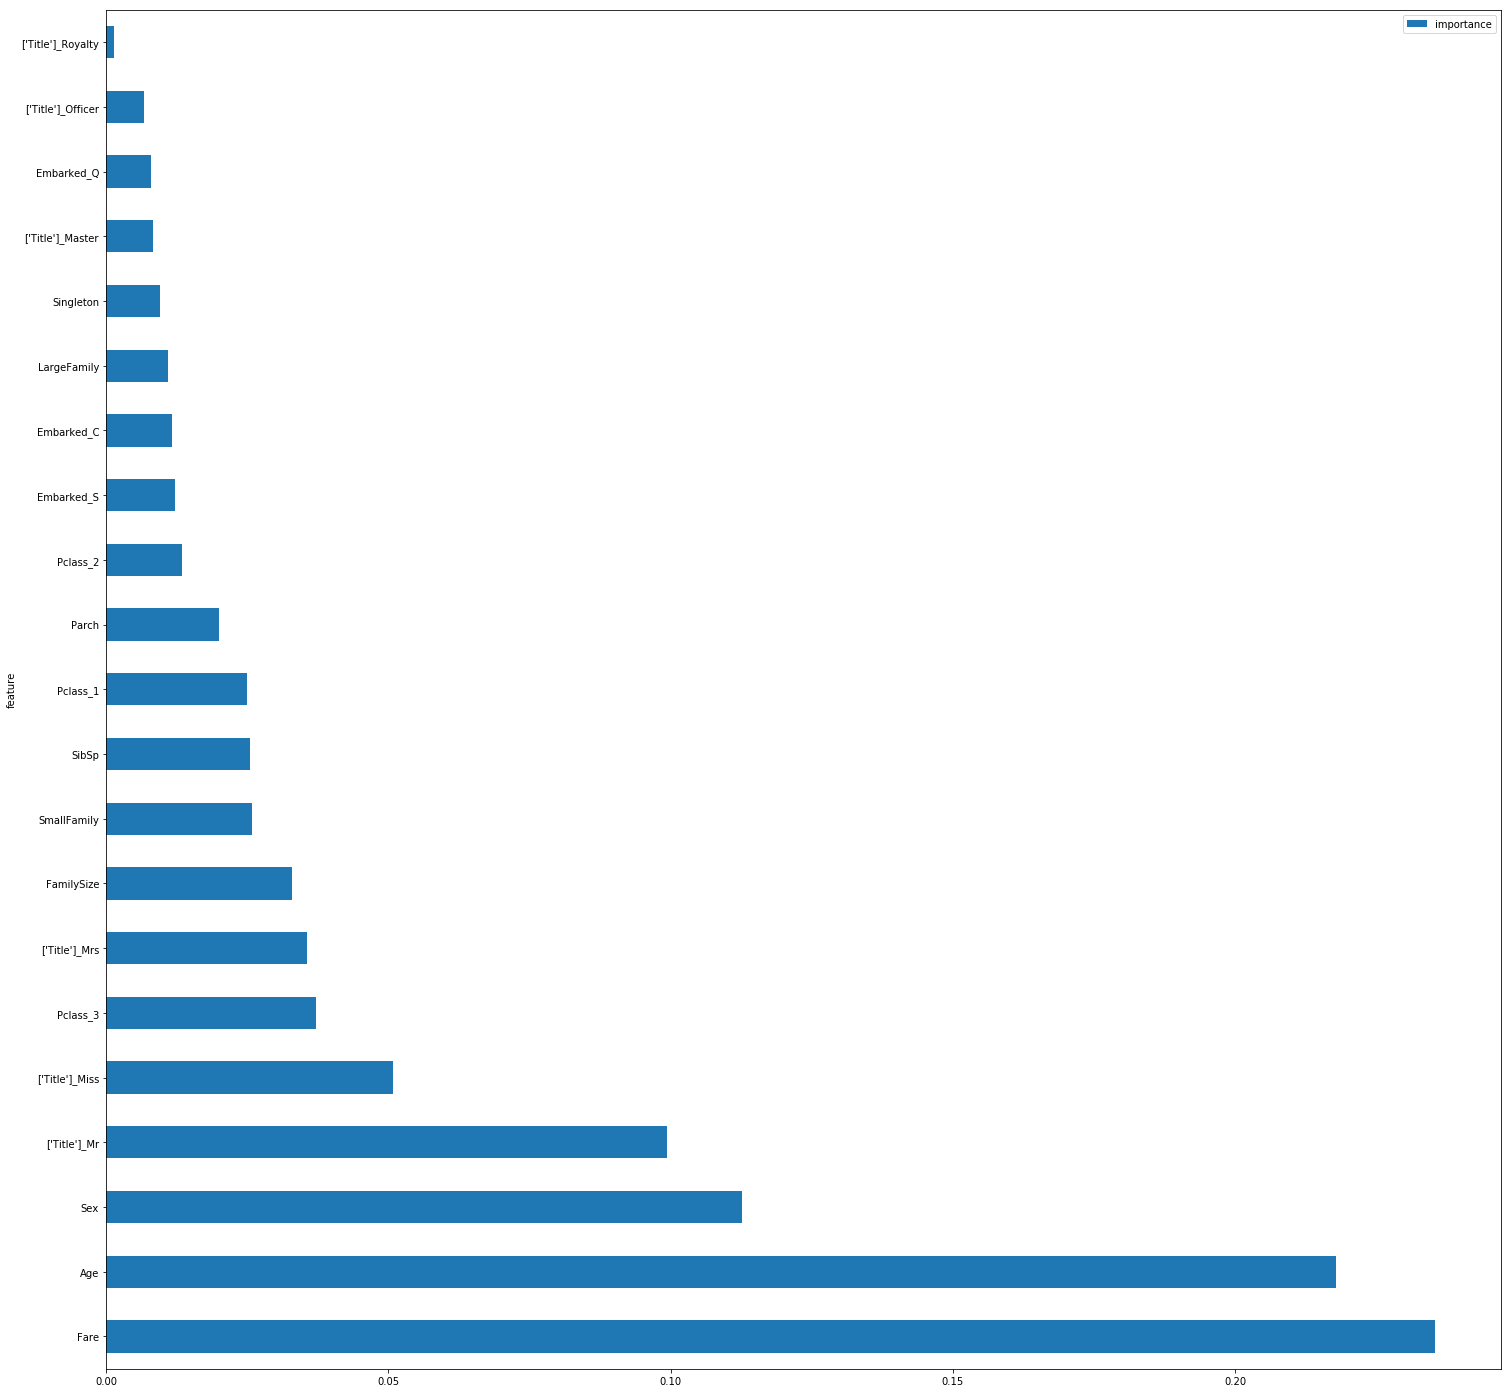

In [47]:
features.plot(kind='barh', figsize=(25, 25))

So Fare , Age, Title_Mr and Sex seems to the important Features for the dataset

Next let's reduce the number of attributes to the important ones only (I feel upto family size all seem to be important)

In [55]:
model = SelectFromModel(clf, prefit=True,threshold=0.025)
train = model.transform(train)
train.shape

ValueError: X has a different shape than during fitting.

Similar for the test data

In [49]:
test = model.transform(test)
test.shape

(418, 10)

Using Classifiers

In [50]:
def rf_Classifier(train,target,test):
    rf = RandomForestClassifier()
    parameter_grid = {
                     'max_depth' : [8],
                     'n_estimators': [50],
                     'max_features': ['sqrt'],
                     'min_samples_split': [10],
                     'min_samples_leaf': [1],
                     'bootstrap': [True]
                     }   
    grid_search = GridSearchCV(rf,scoring='accuracy', param_grid=parameter_grid,cv=5,verbose=1)
    grid_search.fit(train, target)
    model = grid_search
    parameters = model.best_params_
    output = model.predict(test).astype(int)
    return output

In [51]:
def save_csv(output):
    df_output = pd.DataFrame()
    aux = pd.read_csv('test.csv')
    df_output['PassengerId'] = aux['PassengerId']
    df_output['Survived'] = output
    df_output[['PassengerId','Survived']].to_csv('gridsearch_rf.csv', index=False)
    
output = rf_Classifier(train,target,test)
save_csv(output)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished


In [52]:
def Linear_Reg(train,target,test):
    lr = LinearRegression()
    grid_search_lr = GridSearchCV(lr, param_grid=dict(), verbose=3,scoring='accuracy',cv=10).fit(train,target)
    lr_best = grid_search_lr.best_estimator_

    lr_best.fit(train,target) 
    output = lr_best.predict(test)       
    return output

output = rf_Classifier(train,target,test)
save_csv(output)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished


In [53]:
def Decision_Tree_Classfier(train,target,test):
    dt = DecisionTreeClassifier()
    grid_search_dt = GridSearchCV(dt, param_grid=dict(), verbose=3,scoring='accuracy',cv=10).fit(train,target)
    dt_best = grid_search_dt.best_estimator_

    dt_best.fit(train,target) 
    output = dt_best.predict(test)       
    return output

output = Decision_Tree_Classfier(train,target,test)
save_csv(output)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV]  ................................................................
[CV] ....................... , score=0.7444444444444445, total=   0.0s
[CV]  ................................................................
[CV] ...................................... , score=0.8, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.6853932584269663, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.8089887640449438, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.8314606741573034, total=   0.0s
[CV]  ................................................................
[CV] ........................ , score=0.797752808988764, total=   0.0s
[CV]  ................................................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [54]:
def SVM(train,target,test):
    dt = svm.SVC()
#     grid_search_dt = GridSearchCV(dt, param_grid=dict(), verbose=3,scoring='accuracy',cv=10).fit(train,target)
#     dt_best = grid_search_dt.best_estimator_

    dt.fit(train,target) 
    output = dt.predict(test)       
    return output

output = SVM(train,target,test)
output[output < 0.5] = 0
output[output > 0.5] = 1
save_csv(output)